<a href="https://colab.research.google.com/github/DomMc97/Climbing_Data/blob/master/data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Explorarion of Climbing Data

A notebook which cleans merges and visualises the climbing and weather data for Mt. Rainier.

## Set Up
Import libraries.

In [46]:
# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() #sets design of figures

# data analytics library
import pandas as pd
pd.set_option('precision', 5) # 5 decimal places

# colab libraries
from google.colab import files

Upload data.

In [47]:
upload = files.upload()

Saving climbing_statistics.csv to climbing_statistics (1).csv
Saving Rainier_Weather.csv to Rainier_Weather (1).csv


## Importation and Cleaning of Data

Imports, cleans and merges the data of climbing statistics for Mount Rainier and weather.

### Climbing Data

Importation of data containing the succesess and attempts for given routes of ascent up Mount Rainier on given dates. 

In [48]:
# climbing statistics data
climb = pd.read_csv('climbing_statistics.csv')

# display data
print('Climbing Statistics dataset.\n')
print('Size:', climb.shape)
climb.head()

Climbing Statistics dataset.

Size: (4077, 5)


,Date,Route,Attempted,Succeeded,Success Percentage
0,11/27/2015,Disappointment Cleaver,2,0,0.0
1,11/21/2015,Disappointment Cleaver,3,0,0.0
2,10/15/2015,Disappointment Cleaver,2,0,0.0
3,10/13/2015,Little Tahoma,8,0,0.0
4,10/9/2015,Disappointment Cleaver,2,0,0.0


Removal of invalid data.

In [49]:
# removes all attempted <= 0
climb = climb[climb['Attempted'] > 0]

# removes all succeeded < 0
climb = climb[climb['Succeeded'] >= 0]

# removes all succeeded > attempted
climb = climb[climb['Attempted'] >= climb['Succeeded']]

# display data
print('Climbing Statistics dataset.\n')
print('Size:', climb.shape)
climb.head()

Climbing Statistics dataset.

Size: (4067, 5)


,Date,Route,Attempted,Succeeded,Success Percentage
0,11/27/2015,Disappointment Cleaver,2,0,0.0
1,11/21/2015,Disappointment Cleaver,3,0,0.0
2,10/15/2015,Disappointment Cleaver,2,0,0.0
3,10/13/2015,Little Tahoma,8,0,0.0
4,10/9/2015,Disappointment Cleaver,2,0,0.0


In the climbing dataframe we want to find the rows where both the date and route
are identical and aggregate their information. This collates all the information for ascents via a given route on a given day. 

In [50]:
# aggregation
climb = climb.groupby(['Date', 'Route']).sum()

#changes "Route" from index to dataframe 
climb = climb.reset_index(level=[0,1])

Fixes Success percentage since it's aggregation shouldn't be via summation and changes .

In [51]:
# finds the percentage of successful climbs of a given route on a given day
climb['Success Percentage'] = climb['Succeeded'] /climb['Attempted']

# display data
print('Climbing Statistics dataset.\n')
print('Size:', climb.shape)
climb.head()

Climbing Statistics dataset.

Size: (1016, 5)


,Date,Route,Attempted,Succeeded,Success Percentage
0,1/16/2014,Little Tahoma,2,0,0.0
1,1/18/2014,Gibralter Ledges,8,4,0.5
2,1/19/2014,Gibralter Ledges,2,0,0.0
3,1/20/2014,Fuhrer's Finger,2,0,0.0
4,1/23/2014,Little Tahoma,2,0,0.0


All success percentages > 1 are removed.

In [52]:
climb = climb[climb['Success Percentage']<=1]

# display data
print('Climbing Statistics dataset.\n')
print('Size:', climb.shape)
climb.head()

Climbing Statistics dataset.

Size: (1016, 5)


,Date,Route,Attempted,Succeeded,Success Percentage
0,1/16/2014,Little Tahoma,2,0,0.0
1,1/18/2014,Gibralter Ledges,8,4,0.5
2,1/19/2014,Gibralter Ledges,2,0,0.0
3,1/20/2014,Fuhrer's Finger,2,0,0.0
4,1/23/2014,Little Tahoma,2,0,0.0


### Weather Data

Importation of data containing the information of the weather on given dates of climbing. 

In [53]:
# weather data
weather = pd.read_csv('Rainier_Weather.csv')

# remove irrelavent column
weather = weather.drop(['Battery Voltage AVG'], axis=1)

# display data
print('Weather dataset.\n')
print('Size:', weather.shape)
weather.head()

Weather dataset.

Size: (464, 6)


,Date,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Wind Direction AVG,Solar Radiation AVG
0,12/31/2015,19.06292,21.87083,21.97779,62.32583,84.91529
1,12/30/2015,14.63121,18.49383,3.54054,121.50542,86.19283
2,12/29/2015,6.61429,34.07292,0.00000,130.29167,85.10092
3,12/28/2015,8.68704,70.55792,0.00000,164.68375,86.24125
4,12/27/2015,14.14042,95.75417,0.00000,268.47917,31.09071


### Merged Data
Merger of climbing statistics and weather data. Only keeping rows where data exists for both.

In [54]:
# merges data on "Date"
mtRainier = pd.merge(climb, weather, on='Date')

# makes 'date' a datetime objects and sorts chronologically.
mtRainier['Date'] = pd.to_datetime(mtRainier['Date'])
mtRainier = mtRainier.sort_values(by='Date')
mtRainier = mtRainier.reset_index(drop = True)

# display data
print('Merged dataset.\n')
print('Size:', mtRainier.shape)
mtRainier.head()

Merged dataset.

Size: (483, 10)


,Date,Route,Attempted,Succeeded,Success Percentage,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Wind Direction AVG,Solar Radiation AVG
0,2014-09-23,Disappointment Cleaver,11,0,0.00000,32.85733,100.00000,65.11067,254.27333,16.59380
1,2014-09-24,Disappointment Cleaver,12,0,0.00000,29.70292,100.00000,45.91500,278.05417,37.87371
2,2014-09-25,Disappointment Cleaver,14,8,0.57143,26.82375,99.85417,3.16621,278.60417,142.69892
3,2014-09-26,Disappointment Cleaver,41,19,0.46341,28.23833,100.00000,0.89763,259.64583,114.40083
4,2014-09-27,Disappointment Cleaver,44,25,0.56818,33.31875,60.20042,7.14092,116.29458,227.59713


## Visualisation of Data
Set of plots visualising all the data for mtRainier.

Figure of attempts, successes and success percentage over time, with an averaging and 95% confidence window where multiple set of ascents occur on the same date.

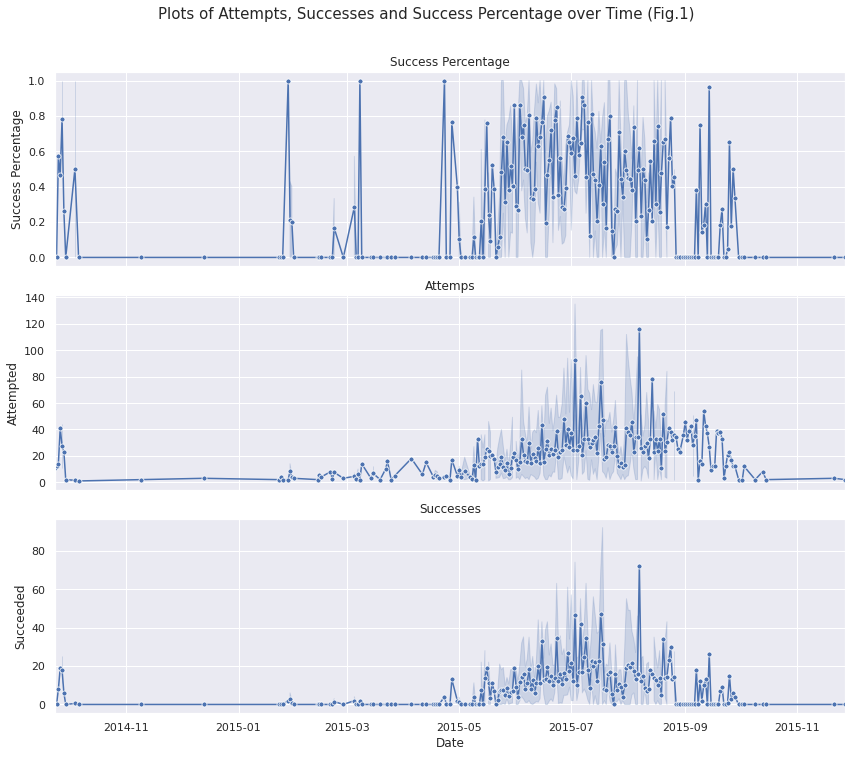

In [55]:
# creates figure
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True,figsize=(12,10))

# title
plt.suptitle('Plots of Attempts, Successes and Success Percentage over Time (Fig.1)', 
             fontsize=15, y=1.05)

# sets axes titles
ax1.title.set_text('Success Percentage')
ax2.title.set_text('Attemps')
ax3.title.set_text('Successes')

ax1.set_xlim([min(mtRainier.Date),max(mtRainier.Date)])
ax2.set_xlim([min(mtRainier.Date),max(mtRainier.Date)])
ax3.set_xlim([min(mtRainier.Date),max(mtRainier.Date)])

# plots data
sns.lineplot(x='Date', y='Success Percentage', data=mtRainier,ax=ax1,marker='o',markersize=5)
sns.lineplot(x='Date', y='Attempted', data=mtRainier, ax=ax2,marker='o',markersize=5)
sns.lineplot(x="Date", y='Succeeded', data=mtRainier, ax=ax3,marker='o',markersize=5)

# stops overlap of axes
plt.tight_layout()
plt.show()

Figure displaying weather variables across time.

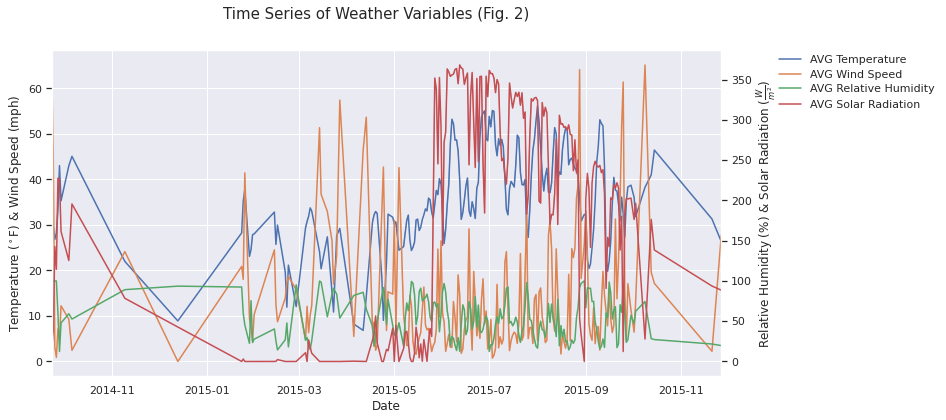

In [56]:
#creates figure
fig = plt.figure()

#sets figure size
fig.set_size_inches(12, 6)

#creates axes
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx() 

# set x limits
ax1.set_xlim([min(mtRainier.Date),max(mtRainier.Date)])
ax2.set_xlim([min(mtRainier.Date),max(mtRainier.Date)])


#sets axes titles
fig.suptitle('Time Series of Weather Variables (Fig. 2)', fontsize='15')
               
#plots data
sns.lineplot(x="Date", y="Temperature AVG", data=mtRainier, ax=ax1, label="AVG Temperature")
sns.lineplot(x="Date", y="Wind Speed Daily AVG", data=mtRainier, ax=ax1, label="AVG Wind Speed")
sns.lineplot(x="Date", y="Relative Humidity AVG", data=mtRainier,color='g', ax=ax2, label="AVG Relative Humidity")
sns.lineplot(x="Date", y="Solar Radiation AVG", data=mtRainier,color='r', ax=ax2, label="AVG Solar Radiation")

#sets y-axes titles
ax1.set_ylabel('Temperature ($^\circ$F) & Wind Speed (mph)')
ax2.set_ylabel(r'Relative Humidity (%) & Solar Radiation ($\frac{W}{m^{2}}$)')

#creates legend
ax1.legend(bbox_to_anchor=(1.08, 1), loc='upper left', borderaxespad=0.,frameon=False)
ax2.legend(bbox_to_anchor=(1.08, 0.91), loc='upper left', borderaxespad=0.,frameon=False)

#removes grid
ax2.grid(False)

 A histogram of the weather variables.

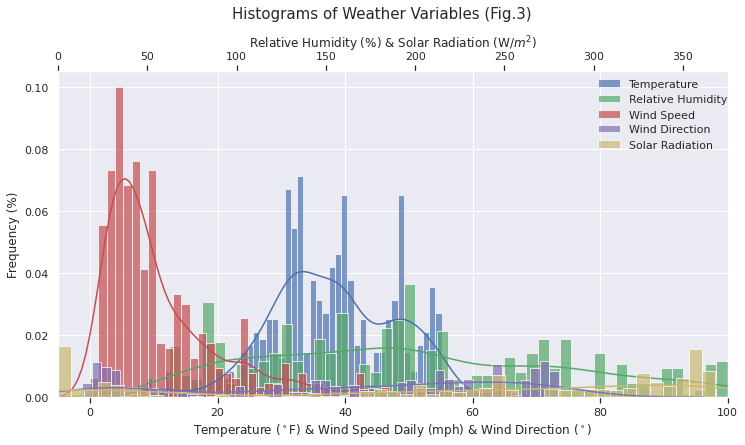

In [57]:
#creates figure
fig = plt.figure()

#sets figure size
fig.set_size_inches(12, 6)

#creates axes
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

#sets axes titles
fig.suptitle('Histograms of Weather Variables (Fig.3)', fontsize='15',y=1.03) #y=1.03 moves title up to stop overlap

#sets x-axes ranges
ax1.set_xlim([-5, 100])
ax2.set_xlim([0, 375])

#data to plot
temp = mtRainier['Temperature AVG']
hum = mtRainier['Relative Humidity AVG']
wind_s = mtRainier['Wind Speed Daily AVG']
wind_d = mtRainier['Wind Direction AVG']
solar = mtRainier['Solar Radiation AVG']

#plots data
sns.distplot(temp, bins=50, ax=ax1, label="Temperature",color='b',hist_kws=dict(alpha=0.7))
sns.distplot(hum, bins=50, ax=ax1, label="Relative Humidity",color='g',hist_kws=dict(alpha=0.7))
sns.distplot(wind_s, bins=50, ax=ax1, label="Wind Speed",color='r',hist_kws=dict(alpha=0.7))
sns.distplot(wind_d, bins=50, ax=ax2, label="Wind Direction",color='m',hist_kws=dict(alpha=0.7))
sns.distplot(solar, bins=50, ax=ax2, label="Solar Radiation",color='y',hist_kws=dict(alpha=0.7))

#sets axes titles
ax1.set_xlabel('Temperature ($^\circ$F) & Wind Speed Daily (mph) & Wind Direction ($^\circ$)')
ax2.set_xlabel(r'Relative Humidity (%) & Solar Radiation (W/$m^{2}}$)')
ax1.set_ylabel('Frequency (%)')

#creates legend
ax1.legend(bbox_to_anchor=(0.8, 0.99), loc='upper left', borderaxespad=0.,frameon=False) 
ax2.legend(bbox_to_anchor=(0.8, 0.85), loc='upper left', borderaxespad=0.,frameon=False)

#removes grid
ax2.grid(False)

A 5 $\times$ 5 grid of correlations between weather variables.

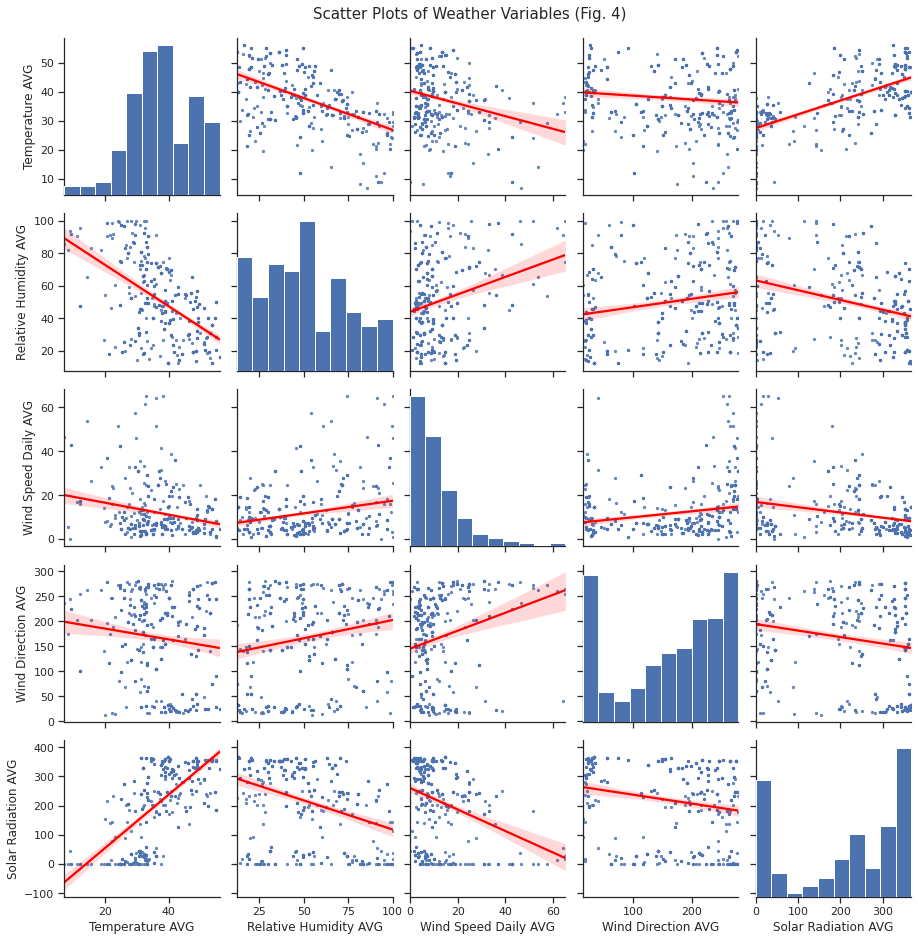

In [58]:
#5x5 plot comparing weather variables
sns.set(style='ticks')
plot = sns.pairplot(mtRainier[['Temperature AVG',
                               'Relative Humidity AVG',
                               'Wind Speed Daily AVG',
                               'Wind Direction AVG',
                               'Solar Radiation AVG']],
                    kind='reg',
                    plot_kws={'line_kws':{'color':'red'},'scatter_kws': {'s': 5}})
plot.fig.suptitle('Scatter Plots of Weather Variables (Fig. 4)', fontsize='15', 
                  y=1.03)

plt.show()

<u>**Impact of relationships on Regression**</u> 

The majority of the weather variables seem to have a weak correlation with eachother. Only a few have an observable relationship I will summarise these below.

**Temperature vs Solar Radiation:** There is a strong positive correlation between Temperature and Solar radiation which is expected since solar radiation is the dominating heating process of the Earth. This means it may be superfluous to contain data on both Solar Radiation and Temperature in our regression task as they provide very 'similar' information as predictors. They will also have similar relationships to other weather variables hence I will colate them for further discussion.

**Temperature/Solar Radiation vs Humidity:** Temperature has negative correlation with humidity, this is a result of the fact as air temperature increases, air can hold more water molecules, and its relative humidity therefore decreases. So if we wish to reduce the variance of our model in the regression task we may consider removing humidity data as to reduce the number of predictors and reduce variance. 

**Humidity vs Wind Direction:** Humidity shows a weak positive correlation with Wind Direction. There is no tangeable explanations for this and the correlation is weak but if we wish to reduce variance we could at the risk of decreasing interoperability.


## Save Merged Dataset

This section concludes the data exploration and cleaning by saving the merged data to a csv file.

In [59]:
# converts dataframe to csv
mtRainier.to_csv('mtRainier.csv')

# downloads csv
files.download('mtRainier.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>